In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
sns.set_theme(style="darkgrid", palette="pastel")
plt.rcParams["figure.figsize"] = (12, 8)

# 1. Carregamento e Visualização Inicial do Dataset

In [2]:
data_path = "../data/Sample - Superstore.csv"
df = pd.read_csv(data_path, encoding="latin1")


print("Dimensões do dataset:", df.shape)
display(df.head())

Dimensões do dataset: (9994, 21)


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


#  2. Pré-processamento e Limpeza de Dados

In [3]:
# Converter colunas de data 
if "Order Date" in df.columns:
    df["Order Date"] = pd.to_datetime(df["Order Date"], errors="coerce")
if "Ship Date" in df.columns:
    df["Ship Date"] = pd.to_datetime(df["Ship Date"], errors="coerce")

# Verificar valores faltantes
print("Valores faltantes por coluna:")
print(df.isnull().sum())

# Verificar registros duplicados
print("\nNúmero de registros duplicados:", df.duplicated().sum())

Valores faltantes por coluna:
Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

Número de registros duplicados: 0


#  3. Estatísticas Descritivas

In [4]:
display(df.describe())

,Row ID,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2016-04-30 00:07:12.259355648,2016-05-03 23:06:58.571142912,55190.379428,229.858001,3.789574,0.156203,28.656896
min,1.000000,2014-01-03 00:00:00,2014-01-07 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2015-05-23 00:00:00,2015-05-27 00:00:00,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2016-06-26 00:00:00,2016-06-29 00:00:00,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2017-05-14 00:00:00,2017-05-18 00:00:00,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2017-12-30 00:00:00,2018-01-05 00:00:00,99301.000000,22638.480000,14.000000,0.800000,8399.976000
std,2885.163629,NaN,NaN,32063.693350,623.245101,2.225110,0.206452,234.260108


#  4. Análise Univariada

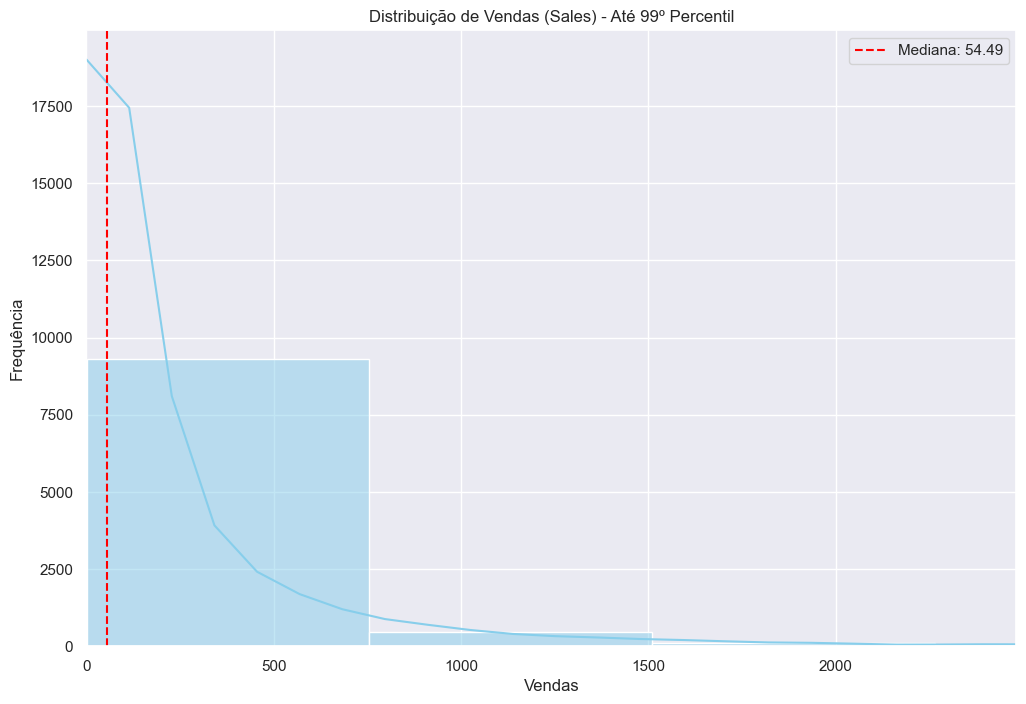

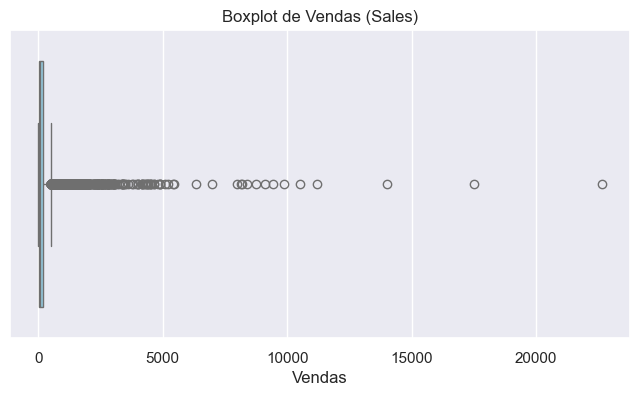

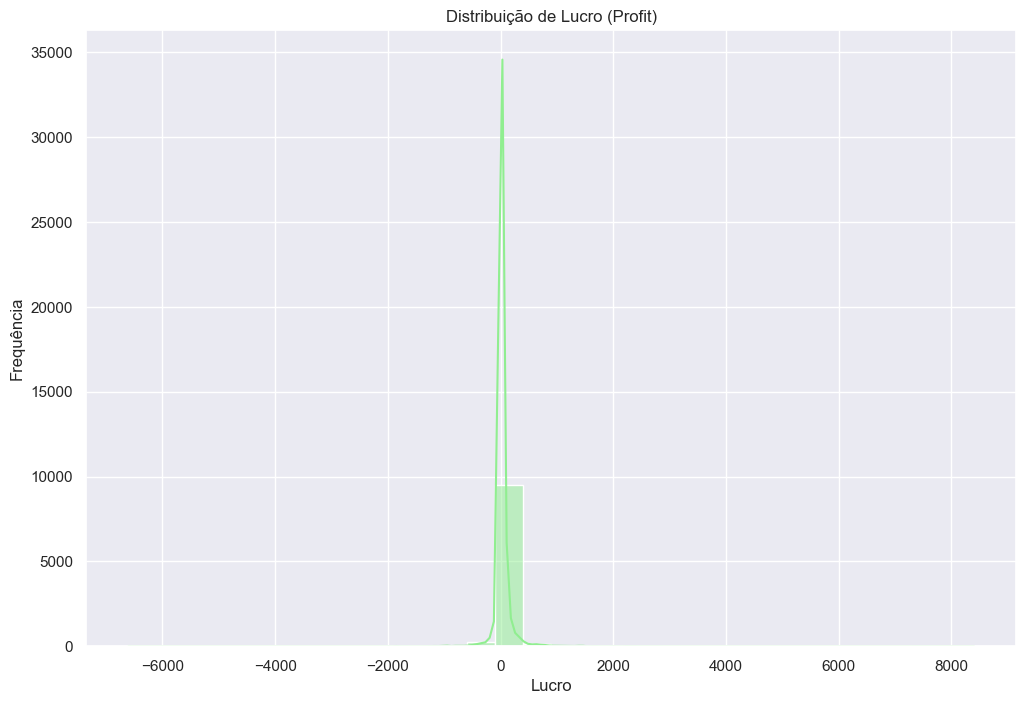

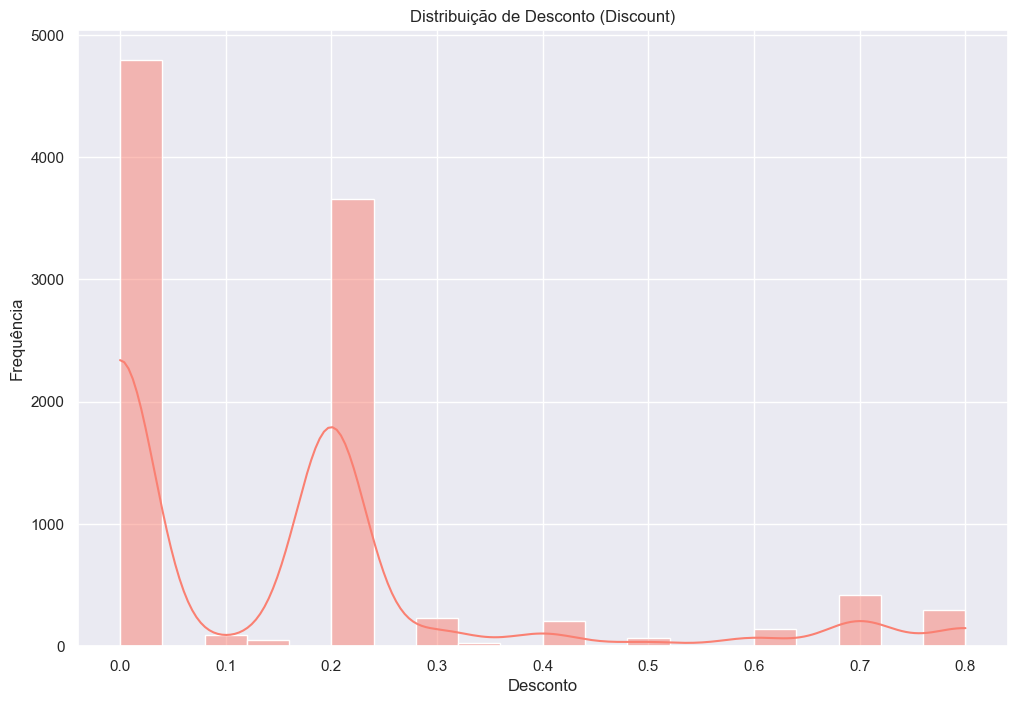

In [5]:
# Distribuição de Vendas (Sales)
# Calcular o 99º percentil e a mediana
upper_bound = df["Sales"].quantile(0.99)
median_value = df["Sales"].median()

# Criar o gráfico de distribuição
plt.figure()
sns.histplot(df["Sales"], kde=True, bins=30, color="skyblue")
plt.xlim(0, upper_bound)  # Limita o eixo x ao 99º percentil
plt.axvline(median_value, color="red", linestyle="--", label=f"Mediana: {median_value:.2f}")
plt.title("Distribuição de Vendas (Sales) - Até 99º Percentil")
plt.xlabel("Vendas")
plt.ylabel("Frequência")
plt.legend()
plt.show()

# Boxplot de Vendas (Sales)
plt.figure(figsize=(8, 4))
sns.boxplot(x=df["Sales"], color="skyblue")
plt.title("Boxplot de Vendas (Sales)")
plt.xlabel("Vendas")
plt.show()


# Distribuição de Lucro (Profit)
plt.figure()
sns.histplot(df["Profit"], kde=True, bins=30, color="lightgreen")
plt.title("Distribuição de Lucro (Profit)")
plt.xlabel("Lucro")
plt.ylabel("Frequência")
plt.show()

# Distribuição de Desconto (Discount), se existir
if "Discount" in df.columns:
    plt.figure()
    sns.histplot(df["Discount"], kde=True, bins=20, color="salmon")
    plt.title("Distribuição de Desconto (Discount)")
    plt.xlabel("Desconto")
    plt.ylabel("Frequência")
    plt.show()

#  5. Análise Bivariada

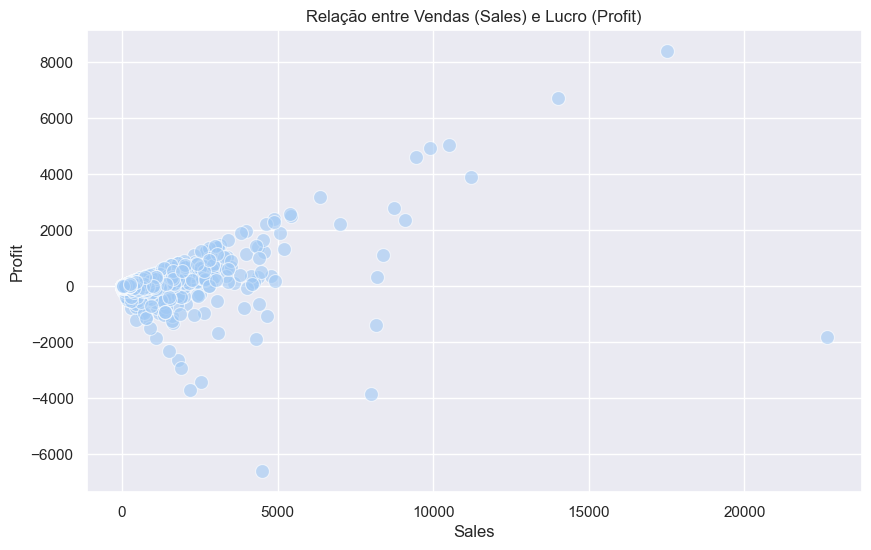

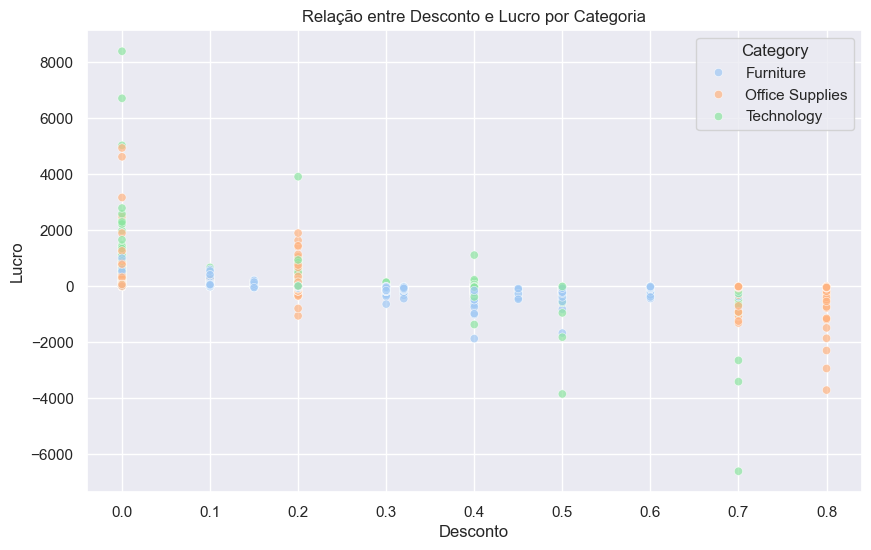

In [6]:
# Relação entre Sales e Profit
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="Sales", y="Profit", alpha=0.6, edgecolor="w", s=100)
plt.title("Relação entre Vendas (Sales) e Lucro (Profit)")
plt.xlabel("Sales")
plt.ylabel("Profit")
plt.show()


# Relação entre Discount e Profit (com distinção por Categoria, se disponível)
if "Discount" in df.columns and "Category" in df.columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x="Discount", y="Profit", hue="Category", alpha=0.7)
    plt.title("Relação entre Desconto e Lucro por Categoria")
    plt.xlabel("Desconto")
    plt.ylabel("Lucro")
    plt.show()

#  6. Análise por Categorias e Regiões

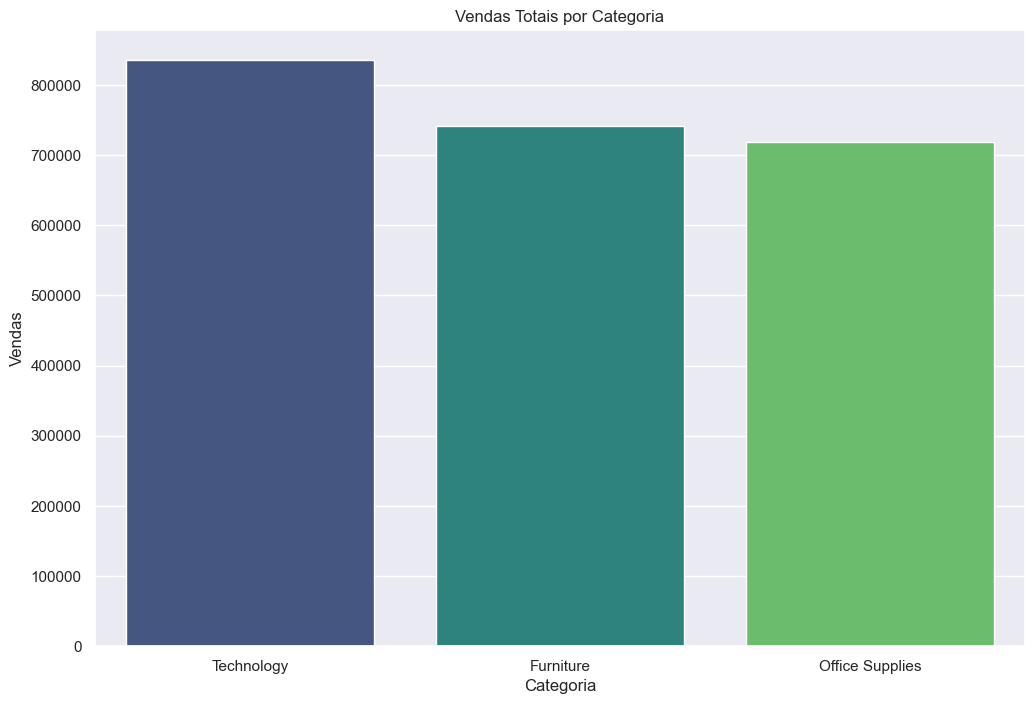

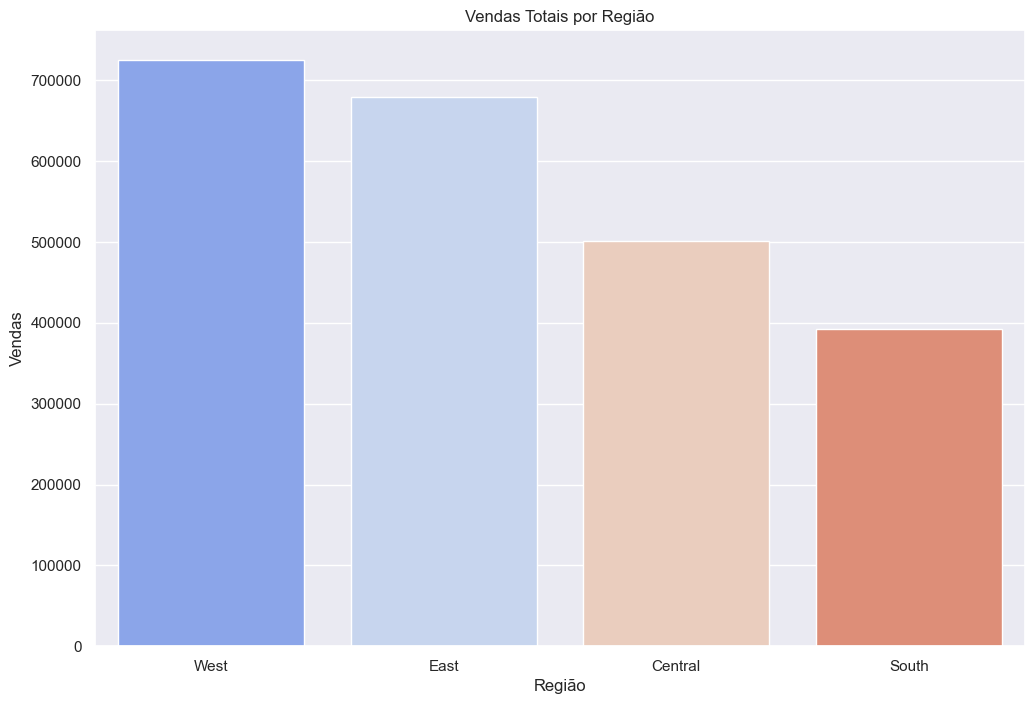

In [7]:
# Vendas totais por Categoria
if "Category" in df.columns:
    categoria_sales = df.groupby("Category")["Sales"].sum().reset_index().sort_values(by="Sales", ascending=False)
    plt.figure()
    sns.barplot(data=categoria_sales, x="Category", y="Sales", palette="viridis")
    plt.title("Vendas Totais por Categoria")
    plt.xlabel("Categoria")
    plt.ylabel("Vendas")
    plt.show()

# Vendas totais por Região
if "Region" in df.columns:
    regiao_sales = df.groupby("Region")["Sales"].sum().reset_index().sort_values(by="Sales", ascending=False)
    plt.figure()
    sns.barplot(data=regiao_sales, x="Region", y="Sales", palette="coolwarm")
    plt.title("Vendas Totais por Região")
    plt.xlabel("Região")
    plt.ylabel("Vendas")
    plt.show()

#  7. Análise de Correlação

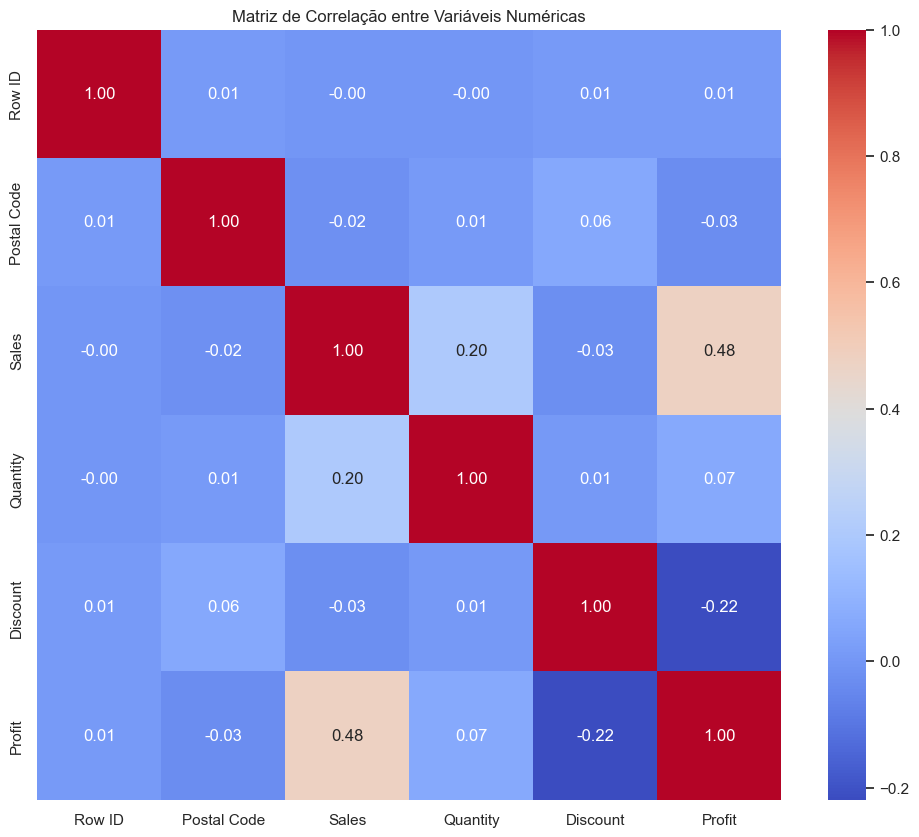

In [8]:
# Selecionar apenas variáveis numéricas
numeric_cols = df.select_dtypes(include=["float64", "int64"])
corr = numeric_cols.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlação entre Variáveis Numéricas")
plt.show()

#  8. Análise Temporal 

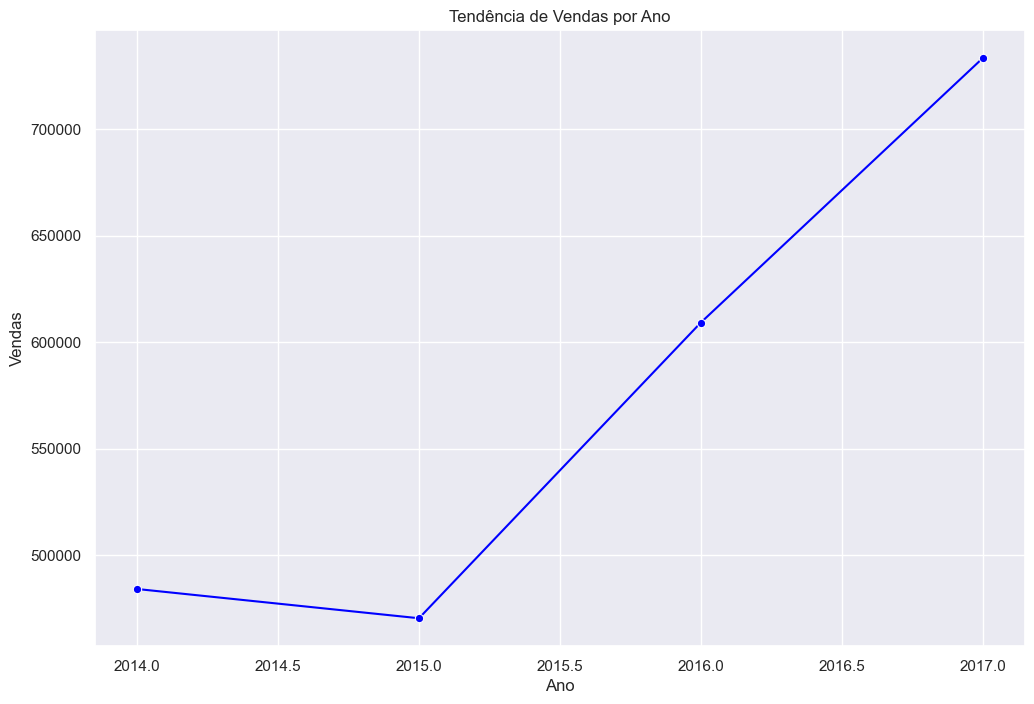

In [9]:
if "Order Date" in df.columns:
    df["Order Year"] = df["Order Date"].dt.year
    vendas_ano = df.groupby("Order Year")["Sales"].sum().reset_index()
    plt.figure()
    sns.lineplot(data=vendas_ano, x="Order Year", y="Sales", marker="o", color="blue")
    plt.title("Tendência de Vendas por Ano")
    plt.xlabel("Ano")
    plt.ylabel("Vendas")
    plt.show()


# 9. Insights e Conclusões

1. **Outliers em Sales e Profit:**  
   - Os histogramas indicam que a distribuição de *Sales* apresenta uma cauda longa à direita, sugerindo a existência de pedidos com vendas muito elevadas. Similarmente, o histograma de *Profit* mostra presença de lucros extremos, tanto positivos quanto negativos.  
   - **Ação:** Investigar os pedidos atípicos para compreender se há clientes ou categorias específicos responsáveis por esses outliers.

2. **Impacto dos Descontos na Rentabilidade:**  
   - O gráfico de dispersão entre *Discount* e *Profit* evidencia que descontos mais elevados estão frequentemente associados a lucros reduzidos ou negativos.  
   - **Ação:** Revisar a política de descontos para identificar oportunidades de ajustar preços e evitar prejuízos.

3. **Diferenças entre Categorias de Produtos:**  
   - A análise de vendas por categoria revela que algumas categorias (como *Technology* ou *Office Supplies*, dependendo dos dados) geram significativamente mais vendas do que outras.  
   - **Ação:** Focar estratégias de marketing e estoque nas categorias com melhor desempenho e investigar a viabilidade de impulsionar as categorias menos performáticas.

4. **Comportamento Regional:**  
   - A análise de vendas por região mostra variações claras, indicando que determinadas regiões têm maior volume de vendas.  
   - **Ação:** Avaliar campanhas regionais e personalizar estratégias de vendas conforme as características e demanda de cada região.

5. **Tendências Temporais:**  
   - Se houver análise temporal (por exemplo, vendas por ano ou mês), pode ser observado um padrão sazonal ou um crescimento/declínio em determinados períodos.  
   - **Ação:** Utilizar esses padrões para planejar campanhas promocionais e ajustes sazonais no estoque e logística.
